ECS308: Data Science and Machine Learning Project | Akanksha Singh, 19022
    

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Loading the data
df = pd.read_csv('dataset.csv')
df

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,2015825,2508182,HH781001,11/15/2002 12:30:00 PM,003XX N ASHLAND AVE,0810,THEFT,OVER $500,STREET,False,...,27.0,28.0,06,1165667.0,1902638.0,2002,02/28/2018 03:56:25 PM,41.888430,-87.667064,"(41.888429628, -87.667063831)"
1,2110300,2687361,HJ308830,04/18/2003 06:10:00 PM,016XX W 18TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,25.0,31.0,08B,1165650.0,1891466.0,2003,02/10/2018 03:50:01 PM,41.857773,-87.667445,"(41.857773091, -87.667444544)"
2,381828,10755691,HZ518320,11/16/2016 09:50:00 PM,009XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,...,24.0,25.0,16,1144531.0,1895566.0,2016,02/10/2018 03:50:01 PM,41.869447,-87.744861,"(41.869447309, -87.744861466)"
3,6048052,8740111,HV415603,08/04/2012 05:15:00 PM,072XX S INGLESIDE AVE,0460,BATTERY,SIMPLE,OTHER,False,...,5.0,69.0,08B,1183801.0,1857416.0,2012,02/04/2016 06:33:39 AM,41.763932,-87.601884,"(41.763931739, -87.601884055)"
4,6873402,11924187,JC549979,12/16/2019 04:45:00 PM,017XX W THOME AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,...,40.0,77.0,14,1163394.0,1941667.0,2019,12/23/2019 03:56:38 PM,41.995575,-87.674309,"(41.995575459, -87.674309158)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,3562445,4714376,HM318809,04/21/2006 12:01:00 AM,022XX S WENTWORTH AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,False,...,25.0,34.0,14,1175327.0,1889358.0,2006,02/10/2018 03:50:01 PM,41.851777,-87.631988,"(41.851777151, -87.631987613)"
99996,4621702,6567536,HP637109,10/19/2008 10:05:00 PM,002XX W CERMAK RD,1360,CRIMINAL TRESPASS,TO VEHICLE,ALLEY,True,...,25.0,34.0,26,1175002.0,1889741.0,2008,02/28/2018 03:56:25 PM,41.852835,-87.633169,"(41.852835409, -87.633168974)"
99997,5483697,7815219,HS625058,11/20/2010 04:50:00 PM,0000X N STATE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,...,42.0,32.0,06,1176362.0,1900577.0,2010,02/10/2018 03:50:01 PM,41.882540,-87.627851,"(41.882539542, -87.627850543)"
99998,3616848,4921843,HM536277,08/12/2006 05:29:00 PM,032XX W ROOSEVELT RD,0530,ASSAULT,AGGRAVATED: OTHER DANG WEAPON,ALLEY,True,...,24.0,29.0,04A,1154766.0,1894523.0,2006,02/28/2018 03:56:25 PM,41.866387,-87.707314,"(41.866386519, -87.707313676)"


# 1. Exploratory Data Analysis (EDA)

In [3]:
df = df.drop(['Latitude', 'Longitude'], axis = 1) #redundant feature, already used in location

In [4]:
# converting dates to pandas datetime format
df.Date = pd.to_datetime(df.Date, format='%m/%d/%Y %I:%M:%S %p')

# setting the index to be the date
df.index = pd.DatetimeIndex(df.Date)
df

,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Beat,District,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Location
Date,,,,,,,,,,,,,,,,,,,,,
2002-11-15 12:30:00,2015825,2508182,HH781001,2002-11-15 12:30:00,003XX N ASHLAND AVE,0810,THEFT,OVER $500,STREET,False,...,1333,12.0,27.0,28.0,06,1165667.0,1902638.0,2002,02/28/2018 03:56:25 PM,"(41.888429628, -87.667063831)"
2003-04-18 18:10:00,2110300,2687361,HJ308830,2003-04-18 18:10:00,016XX W 18TH ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,SIDEWALK,False,...,1222,12.0,25.0,31.0,08B,1165650.0,1891466.0,2003,02/10/2018 03:50:01 PM,"(41.857773091, -87.667444544)"
2016-11-16 21:50:00,381828,10755691,HZ518320,2016-11-16 21:50:00,009XX S CICERO AVE,1506,PROSTITUTION,SOLICIT ON PUBLIC WAY,STREET,True,...,1131,11.0,24.0,25.0,16,1144531.0,1895566.0,2016,02/10/2018 03:50:01 PM,"(41.869447309, -87.744861466)"
2012-08-04 17:15:00,6048052,8740111,HV415603,2012-08-04 17:15:00,072XX S INGLESIDE AVE,0460,BATTERY,SIMPLE,OTHER,False,...,324,3.0,5.0,69.0,08B,1183801.0,1857416.0,2012,02/04/2016 06:33:39 AM,"(41.763931739, -87.601884055)"
2019-12-16 16:45:00,6873402,11924187,JC549979,2019-12-16 16:45:00,017XX W THOME AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,APARTMENT,False,...,2433,24.0,40.0,77.0,14,1163394.0,1941667.0,2019,12/23/2019 03:56:38 PM,"(41.995575459, -87.674309158)"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2006-04-21 00:01:00,3562445,4714376,HM318809,2006-04-21 00:01:00,022XX S WENTWORTH AVE,1310,CRIMINAL DAMAGE,TO PROPERTY,RESTAURANT,False,...,2111,9.0,25.0,34.0,14,1175327.0,1889358.0,2006,02/10/2018 03:50:01 PM,"(41.851777151, -87.631987613)"
2008-10-19 22:05:00,4621702,6567536,HP637109,2008-10-19 22:05:00,002XX W CERMAK RD,1360,CRIMINAL TRESPASS,TO VEHICLE,ALLEY,True,...,2111,9.0,25.0,34.0,26,1175002.0,1889741.0,2008,02/28/2018 03:56:25 PM,"(41.852835409, -87.633168974)"
2010-11-20 16:50:00,5483697,7815219,HS625058,2010-11-20 16:50:00,0000X N STATE ST,0860,THEFT,RETAIL THEFT,DEPARTMENT STORE,True,...,122,1.0,42.0,32.0,06,1176362.0,1900577.0,2010,02/10/2018 03:50:01 PM,"(41.882539542, -87.627850543)"


C:\Users\akank\AppData\Local\Temp\ipykernel_15648\4276766291.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<AxesSubplot: >

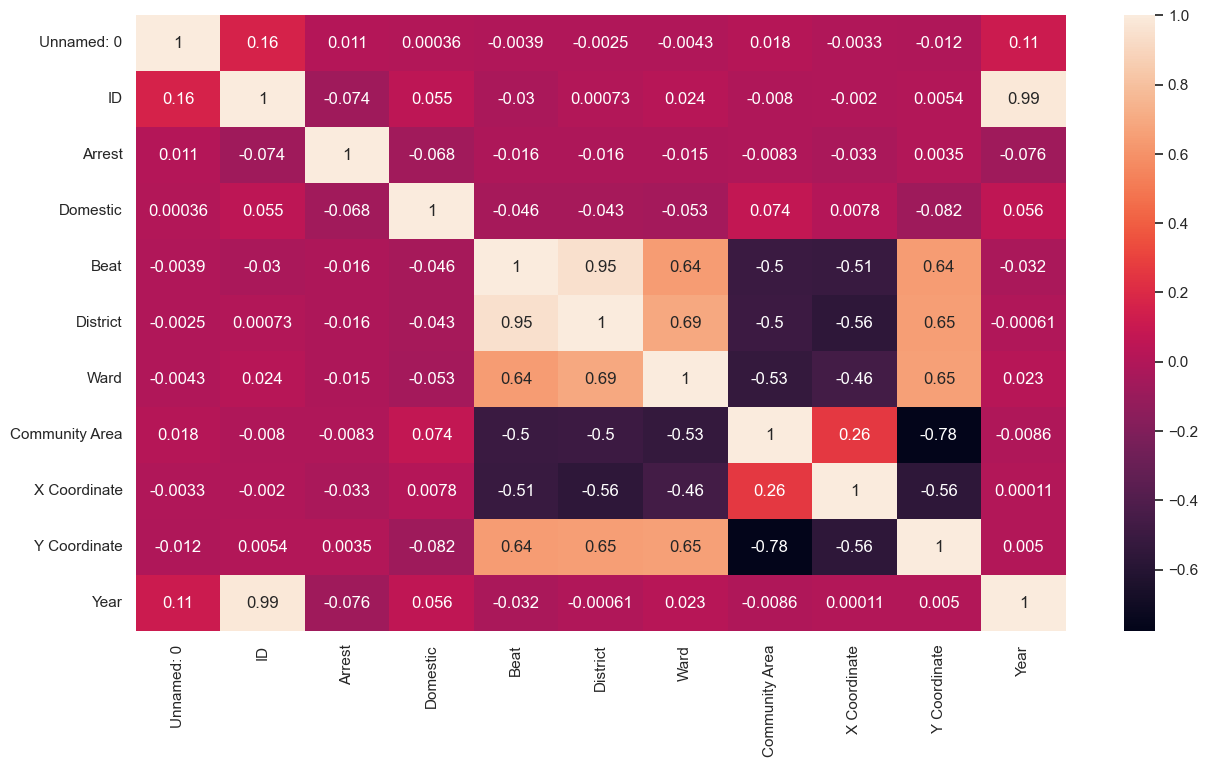

In [5]:
# Plot: Heat Map

correlation = df.corr()
sns.set(rc = {'figure.figsize':(15,8)})
sns.heatmap(correlation, xticklabels = correlation.columns, yticklabels = correlation.columns, annot = True)

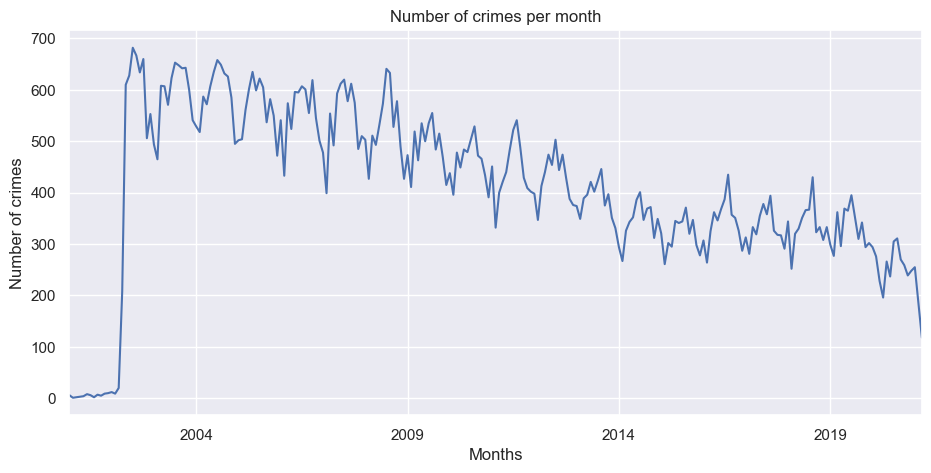

In [6]:
# Plot: Number of crimes per month

plt.figure(figsize=(11,5))
df.resample('M').size().plot(legend=False)
plt.title('Number of crimes per month')
plt.xlabel('Months')
plt.ylabel('Number of crimes')
plt.show()

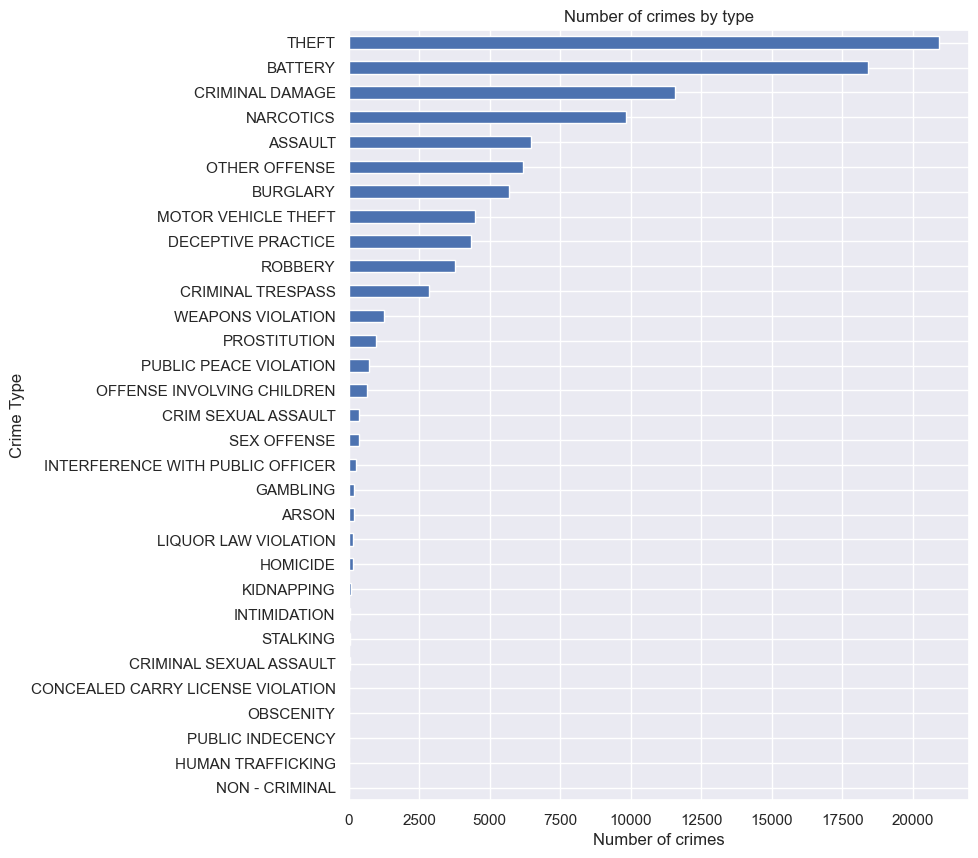

In [7]:
# Plot: Number of crimes by type

plt.figure(figsize=(8,10))
df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by type')
plt.ylabel('Crime Type')
plt.xlabel('Number of crimes')
plt.show()

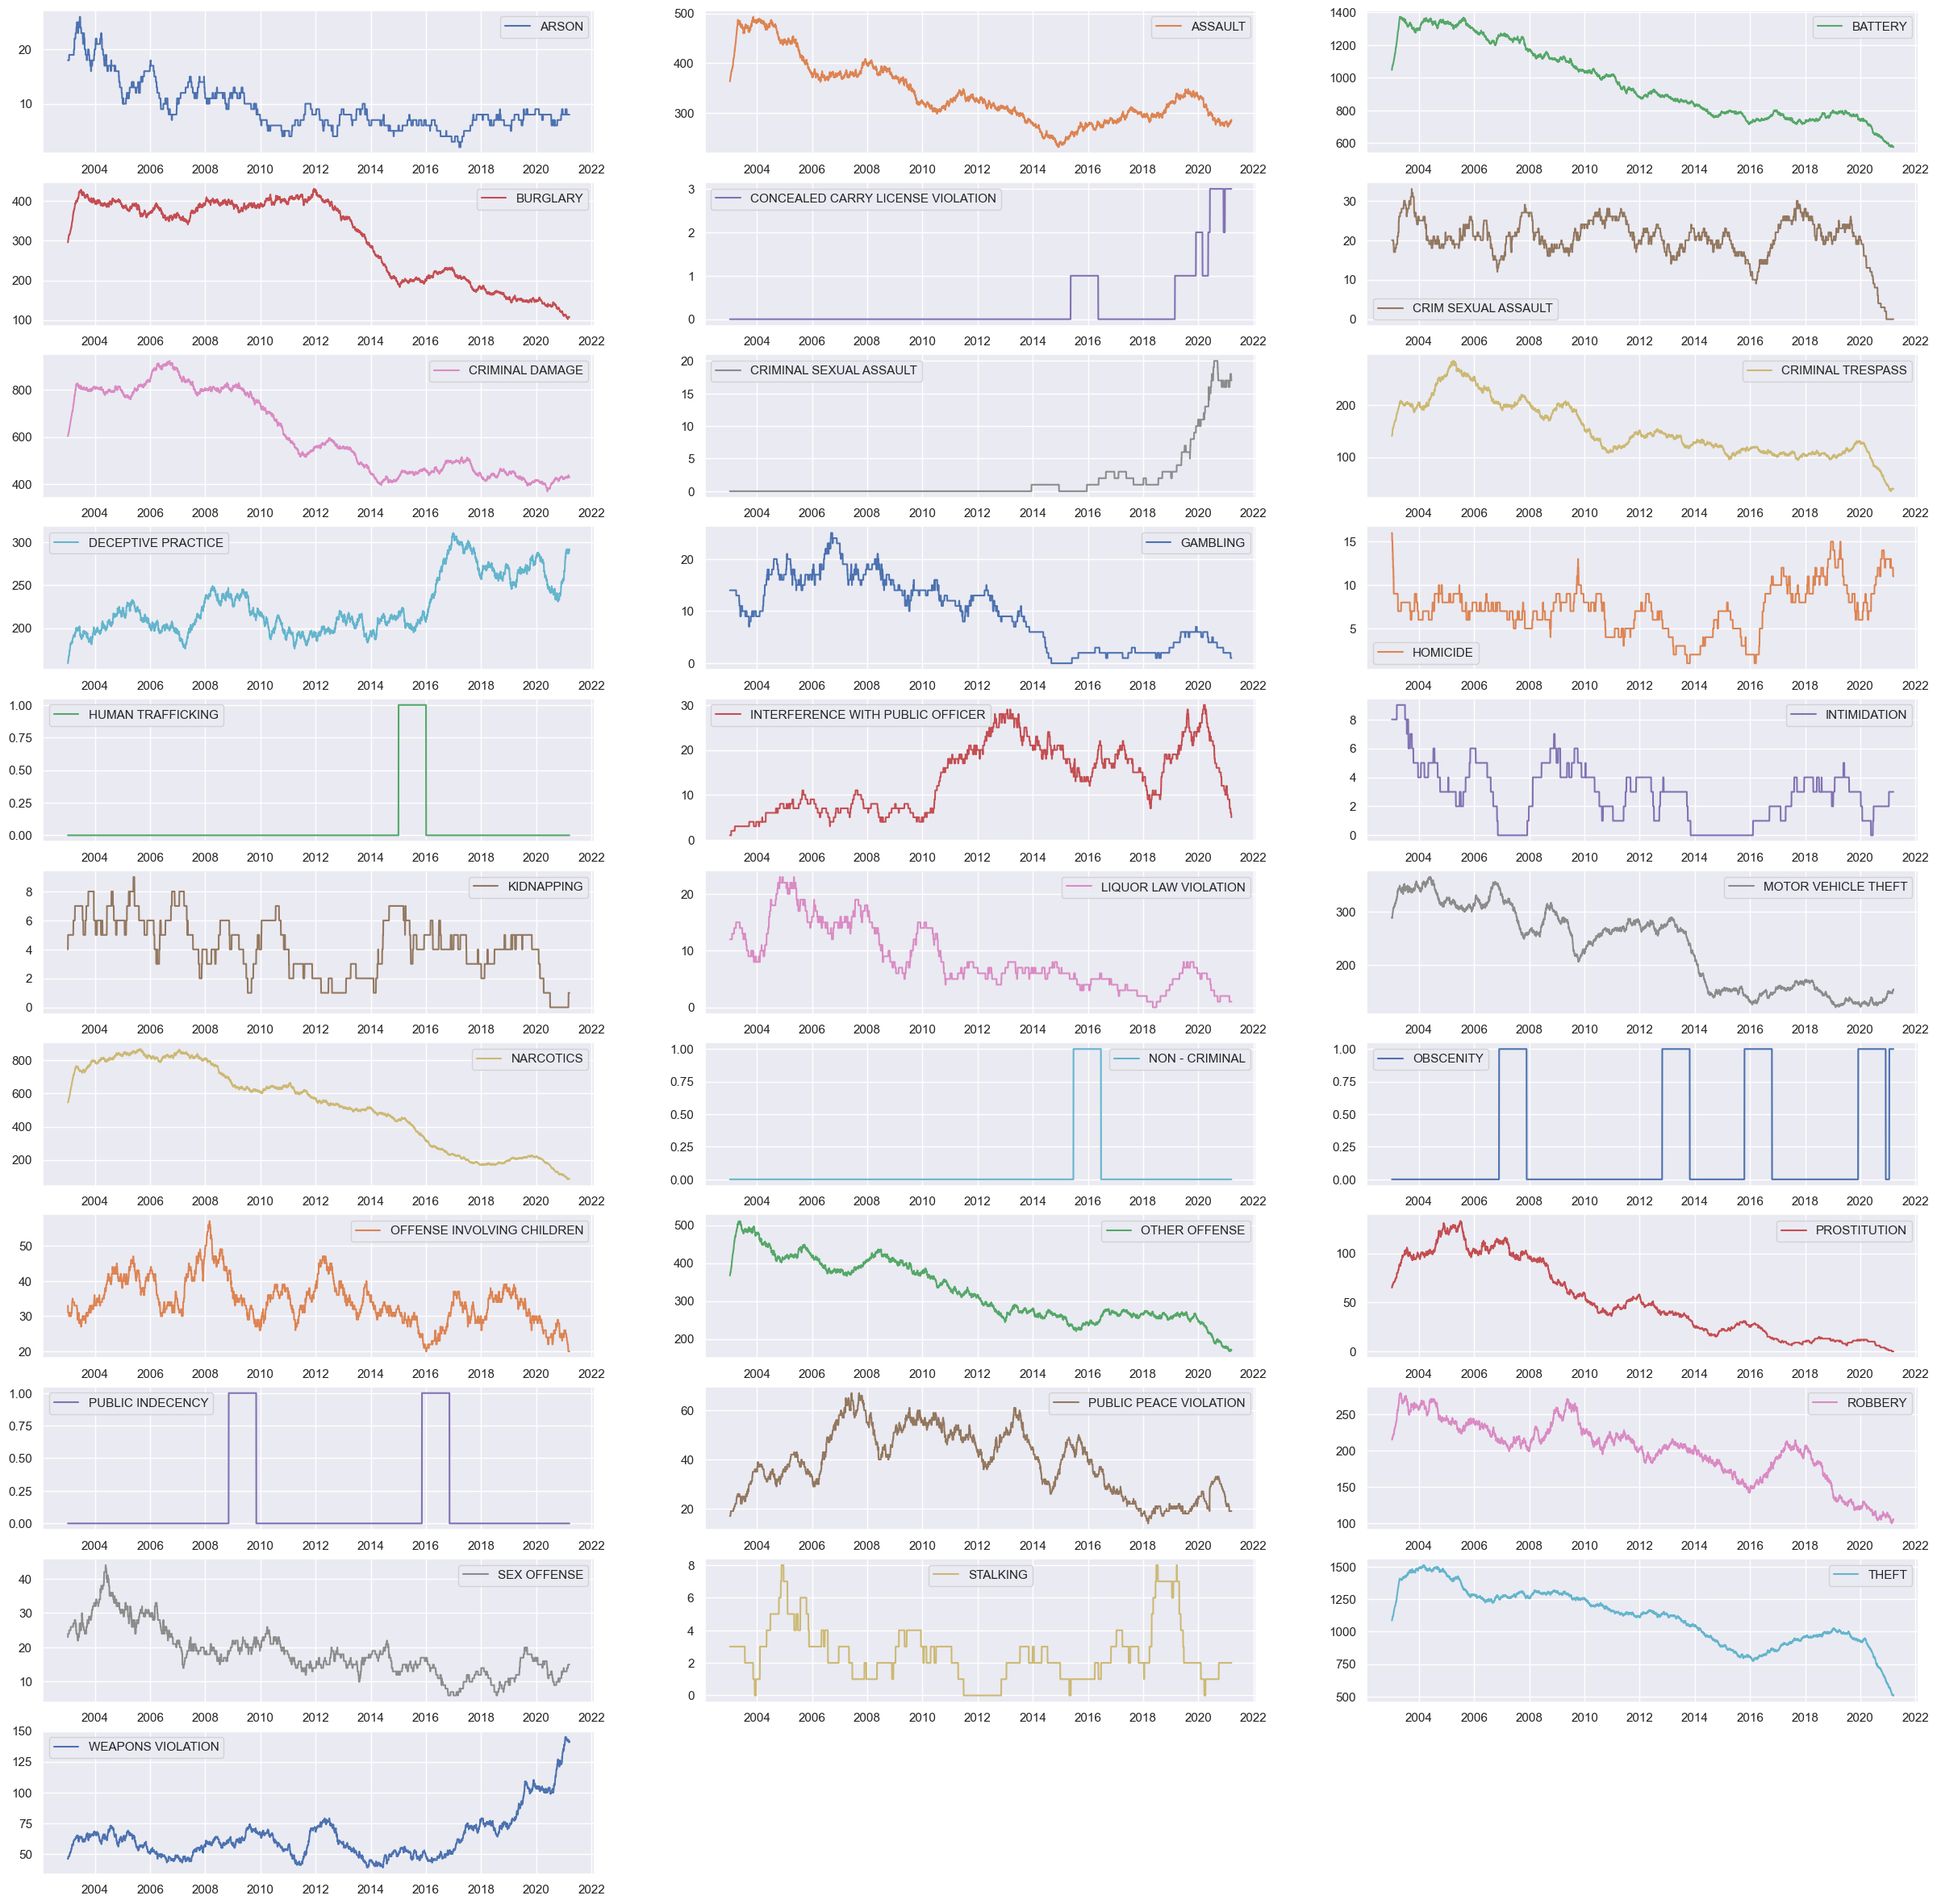

In [8]:
# Plot: Primary Types Vs. Year

df_count_date = df.pivot_table('ID', aggfunc=np.size, columns='Primary Type', index=df.index.date, fill_value=0)
df_count_date.index = pd.DatetimeIndex(df_count_date.index)
plot = df_count_date.rolling(365).sum().plot(figsize=(30, 30), subplots=True, layout=(-1, 3), sharex=False, sharey=False)

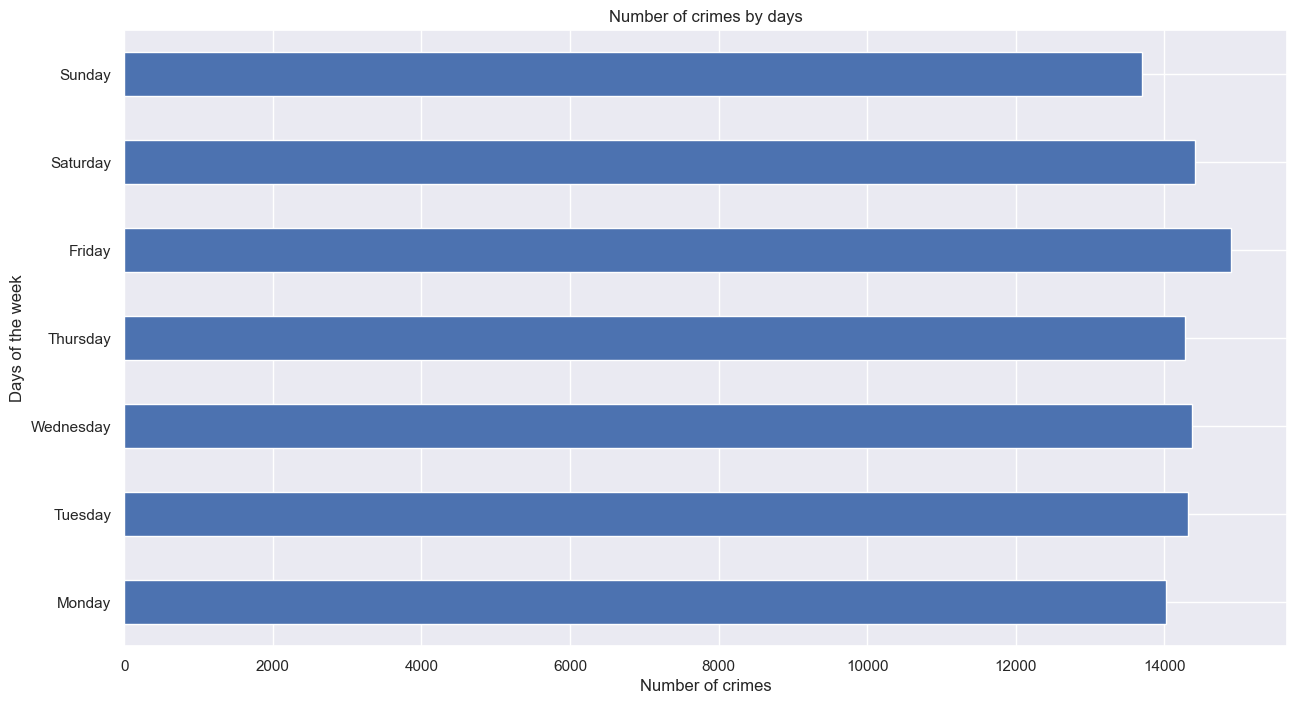

In [9]:
# Plot: Crimes Occuring by the days

days = ['Monday','Tuesday','Wednesday',  'Thursday', 'Friday', 'Saturday', 'Sunday']
df.groupby([df.index.dayofweek]).size().plot(kind='barh')
plt.ylabel('Days of the week')
plt.yticks(np.arange(7), days)
plt.xlabel('Number of crimes')
plt.title('Number of crimes by days')
plt.show()

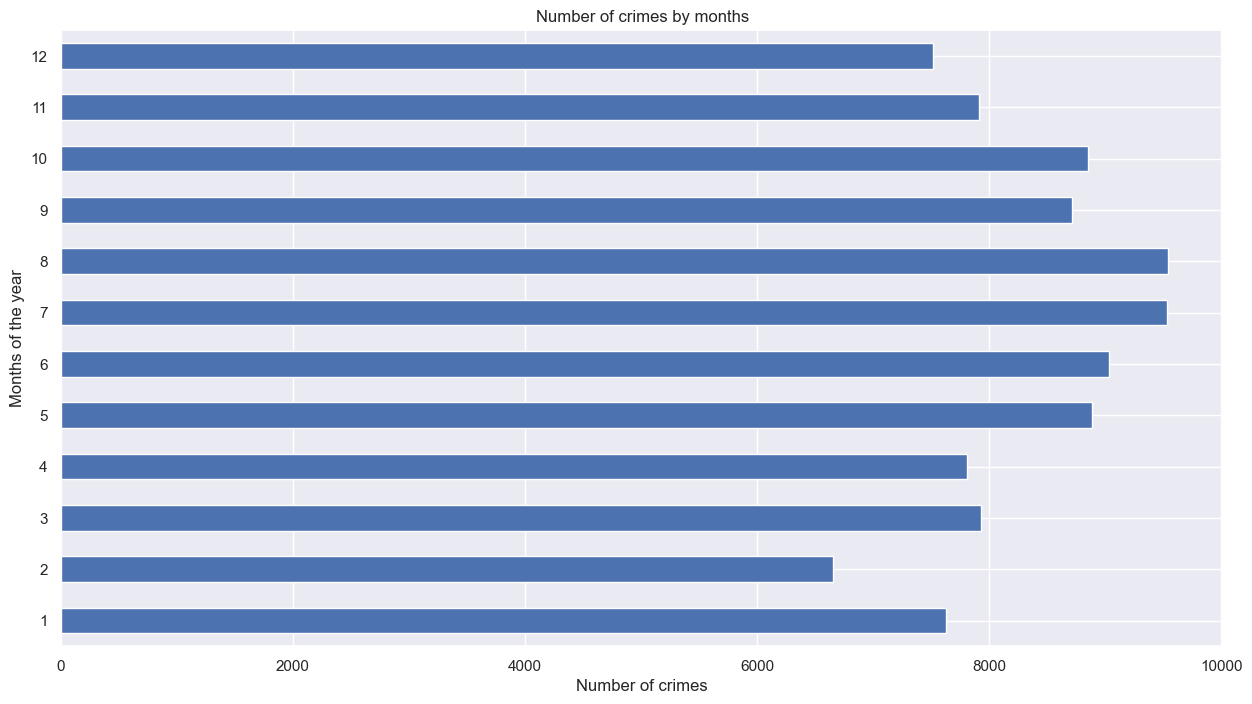

In [10]:
# Plot: Crimes Occuring by Months

df.groupby([df.index.month]).size().plot(kind='barh')
plt.ylabel('Months of the year')
plt.xlabel('Number of crimes')
plt.title('Number of crimes by months')
plt.show()

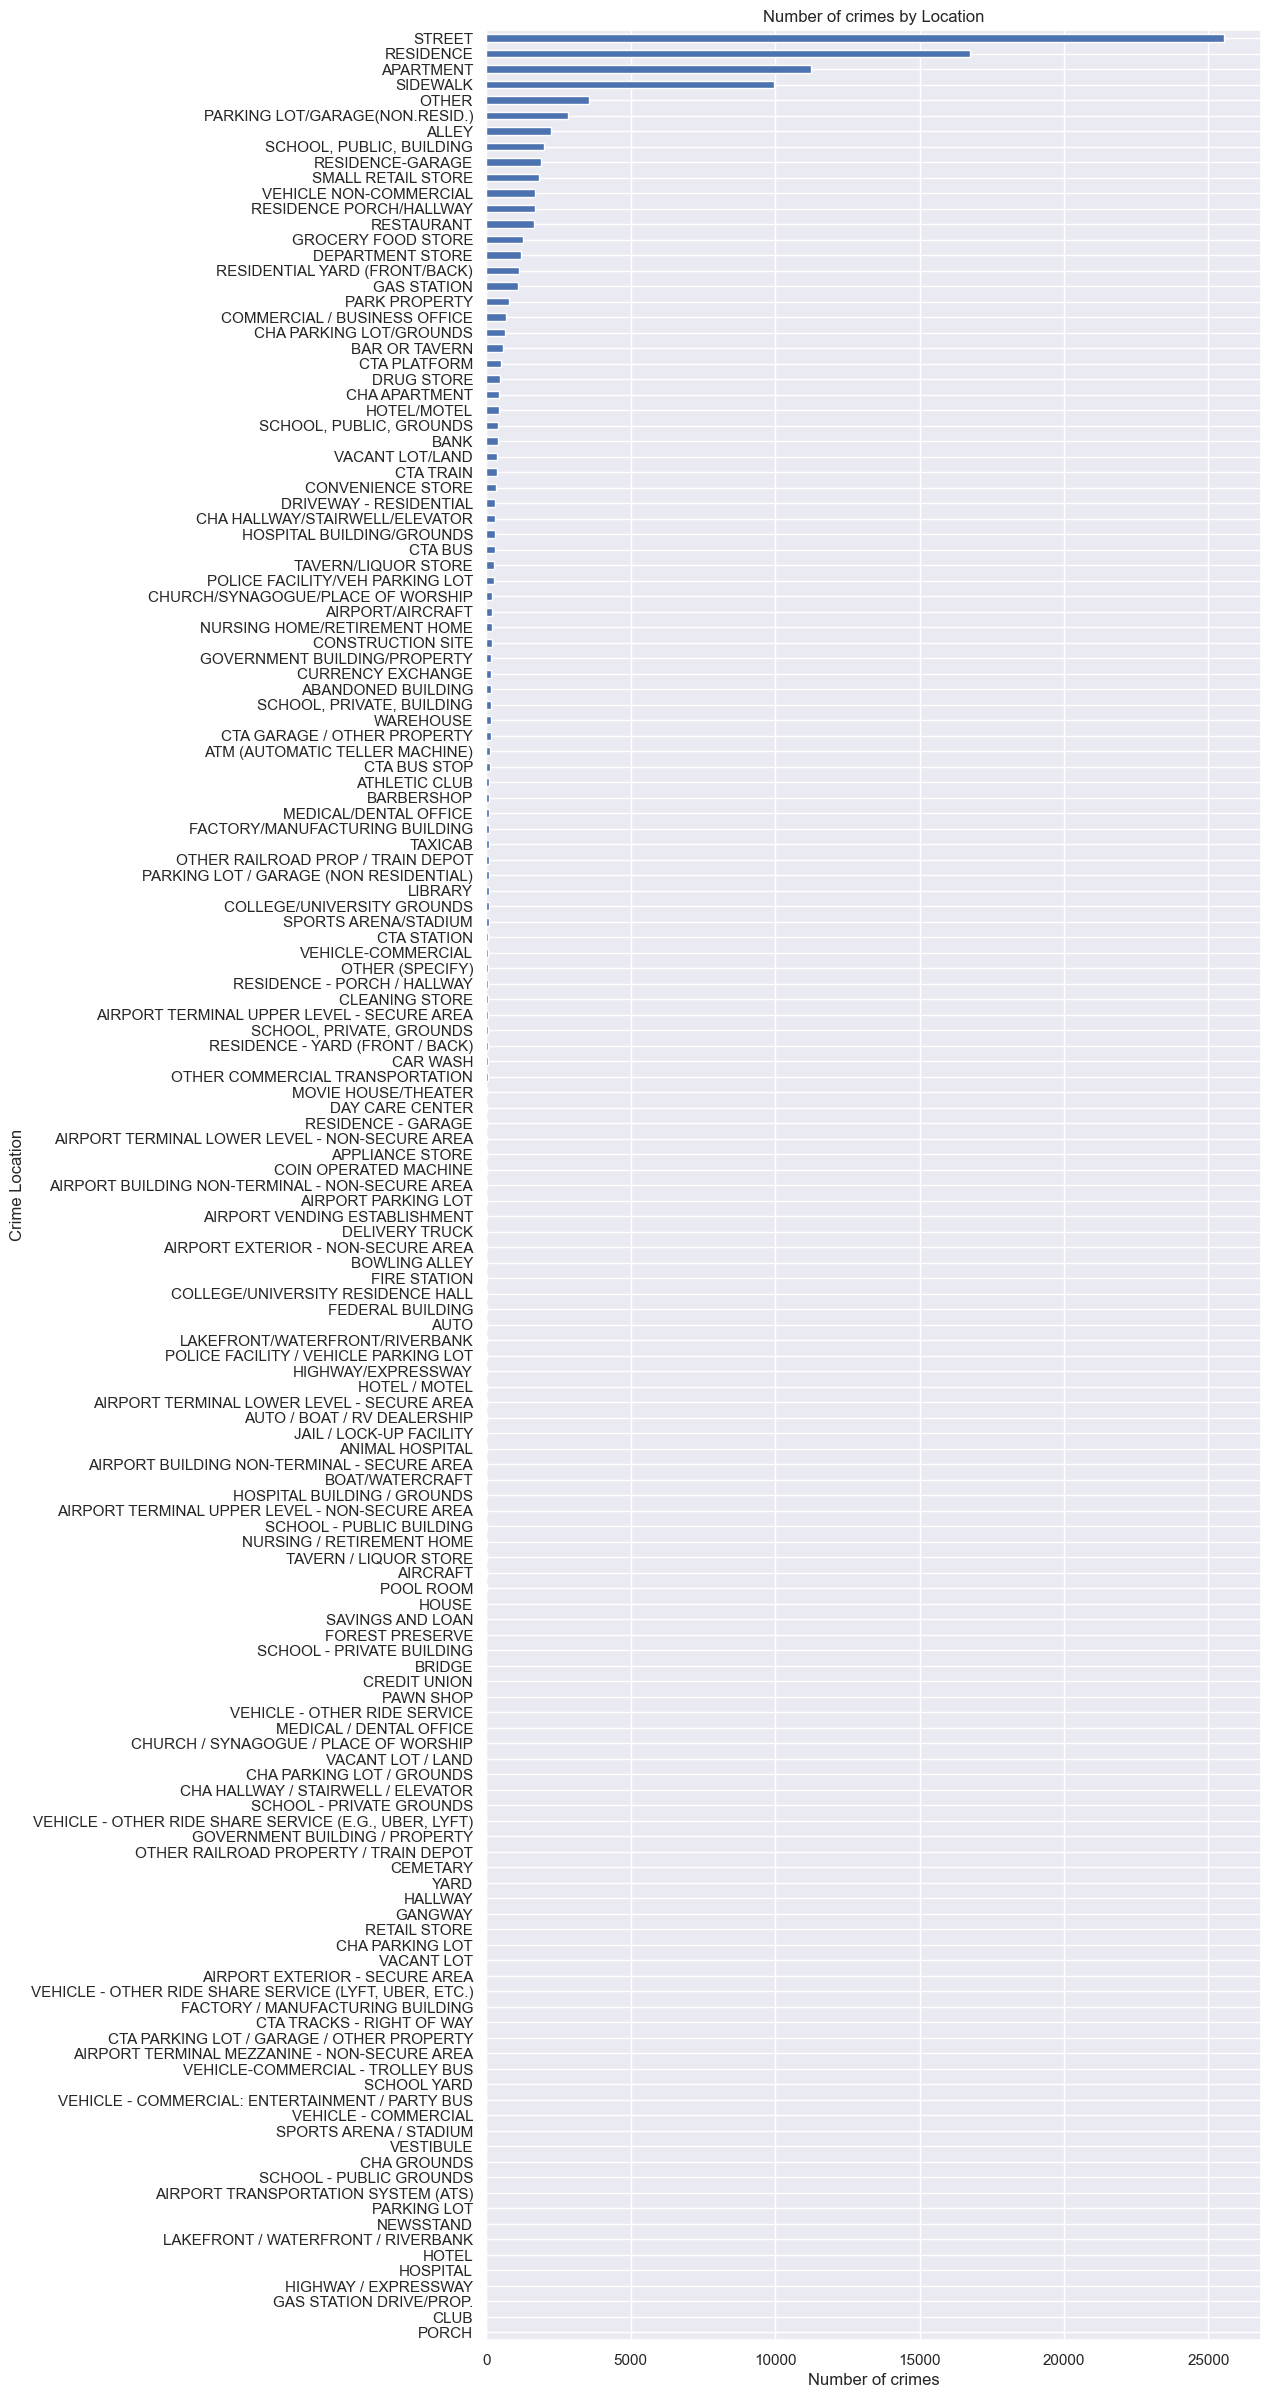

In [11]:
# Plot: Crimes Occuring by Location

plt.figure(figsize=(10, 30))
df.groupby([df['Location Description']]).size().sort_values(ascending=True).plot(kind='barh')
plt.title('Number of crimes by Location')
plt.ylabel('Crime Location')
plt.xlabel('Number of crimes')
plt.show()